In [71]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### 데이터 불러오기

In [72]:
application = pd.read_csv('../data/application_record.csv')
credit = pd.read_csv('../data/credit_record.csv')

In [73]:
print('application :', len(application['ID']))
print('credit :',len(credit['ID']))
print('intersection :',len(set(application['ID']).intersection(set(credit['ID']))))

application : 438557
credit : 1048575
intersection : 36457


In [74]:
application.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS'],
      dtype='object')

In [75]:
application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

### Column명 재정의

In [76]:
application.rename(columns={'CODE_GENDER': 'Gender', 'FLAG_OWN_CAR': 'Car', 'FLAG_OWN_REALTY': 'Reality',
                                'CNT_CHILDREN': 'ChildNo', 'AMT_INCOME_TOTAL': 'Income',
                                'NAME_EDUCATION_TYPE': 'Edutype', 'NAME_FAMILY_STATUS': 'FamilyType',
                                'NAME_HOUSING_TYPE': 'HouseType', 'FLAG_EMAIL': 'Email',
                                'NAME_INCOME_TYPE': 'IncomeType', 'FLAG_WORK_PHONE': 'Wkphone',
                                'FLAG_PHONE': 'Phone', 'CNT_FAM_MEMBERS': 'FamilySize',
                                'OCCUPATION_TYPE': 'Occupy'}, inplace=True)

In [77]:
application.head()

,ID,Gender,Car,Reality,ChildNo,Income,IncomeType,Edutype,FamilyType,HouseType,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,Wkphone,Phone,Email,Occupy,FamilySize
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


### Null 값 채워주기

In [78]:
application.isna().sum()

ID                    0
Gender                0
Car                   0
Reality               0
ChildNo               0
Income                0
IncomeType            0
Edutype               0
FamilyType            0
HouseType             0
DAYS_BIRTH            0
DAYS_EMPLOYED         0
FLAG_MOBIL            0
Wkphone               0
Phone                 0
Email                 0
Occupy           134203
FamilySize            0
dtype: int64

In [79]:
application['Occupy'].fillna('not_specified',inplace=True)

In [80]:
application.isna().sum()

ID               0
Gender           0
Car              0
Reality          0
ChildNo          0
Income           0
IncomeType       0
Edutype          0
FamilyType       0
HouseType        0
DAYS_BIRTH       0
DAYS_EMPLOYED    0
FLAG_MOBIL       0
Wkphone          0
Phone            0
Email            0
Occupy           0
FamilySize       0
dtype: int64

### 신용 점수 매기기

In [81]:
status_point = {'0': 20, '1': 10, '2': 1, '3': -1, '4': -10, '5': -20, 'C': 30, 'X': 0}

credit['Point'] = credit['STATUS'].map(status_point)
scores = credit.groupby('ID')['Point'].sum()

scores_df = scores.reset_index(name='Scores')
scores_df

,ID,Scores
0,5001711,60
1,5001712,470
2,5001713,0
3,5001714,0
4,5001715,0
...,...,...
45980,5150482,420
45981,5150483,0
45982,5150484,270
45983,5150485,40


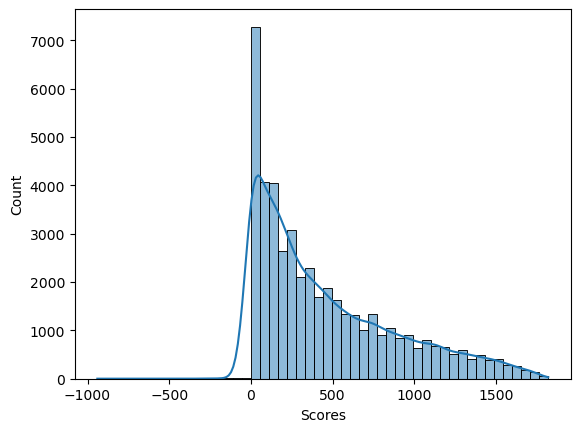

In [82]:
sns.histplot(x=scores_df['Scores'], bins=50, kde=True, fill=True);

In [83]:
merge_df = pd.merge(application, scores_df, on='ID', how='left')

In [84]:
print('Application Record data shape: ',application.shape)
print('Credit Record data shape: ',credit.shape)
print('Merged data shape: ', merge_df.shape)

Application Record data shape:  (438557, 18)
Credit Record data shape:  (1048575, 4)
Merged data shape:  (438557, 19)


In [85]:
merge_df.isna().sum()

ID                    0
Gender                0
Car                   0
Reality               0
ChildNo               0
Income                0
IncomeType            0
Edutype               0
FamilyType            0
HouseType             0
DAYS_BIRTH            0
DAYS_EMPLOYED         0
FLAG_MOBIL            0
Wkphone               0
Phone                 0
Email                 0
Occupy                0
FamilySize            0
Scores           402100
dtype: int64

### Null값 삭제하기

In [86]:
merge_df.dropna(inplace=True)
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36457 entries, 0 to 434812
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             36457 non-null  int64  
 1   Gender         36457 non-null  object 
 2   Car            36457 non-null  object 
 3   Reality        36457 non-null  object 
 4   ChildNo        36457 non-null  int64  
 5   Income         36457 non-null  float64
 6   IncomeType     36457 non-null  object 
 7   Edutype        36457 non-null  object 
 8   FamilyType     36457 non-null  object 
 9   HouseType      36457 non-null  object 
 10  DAYS_BIRTH     36457 non-null  int64  
 11  DAYS_EMPLOYED  36457 non-null  int64  
 12  FLAG_MOBIL     36457 non-null  int64  
 13  Wkphone        36457 non-null  int64  
 14  Phone          36457 non-null  int64  
 15  Email          36457 non-null  int64  
 16  Occupy         36457 non-null  object 
 17  FamilySize     36457 non-null  float64
 18  Scores    

### Correlations
- 숫자형 데이터들의 상관 관계 확인하기

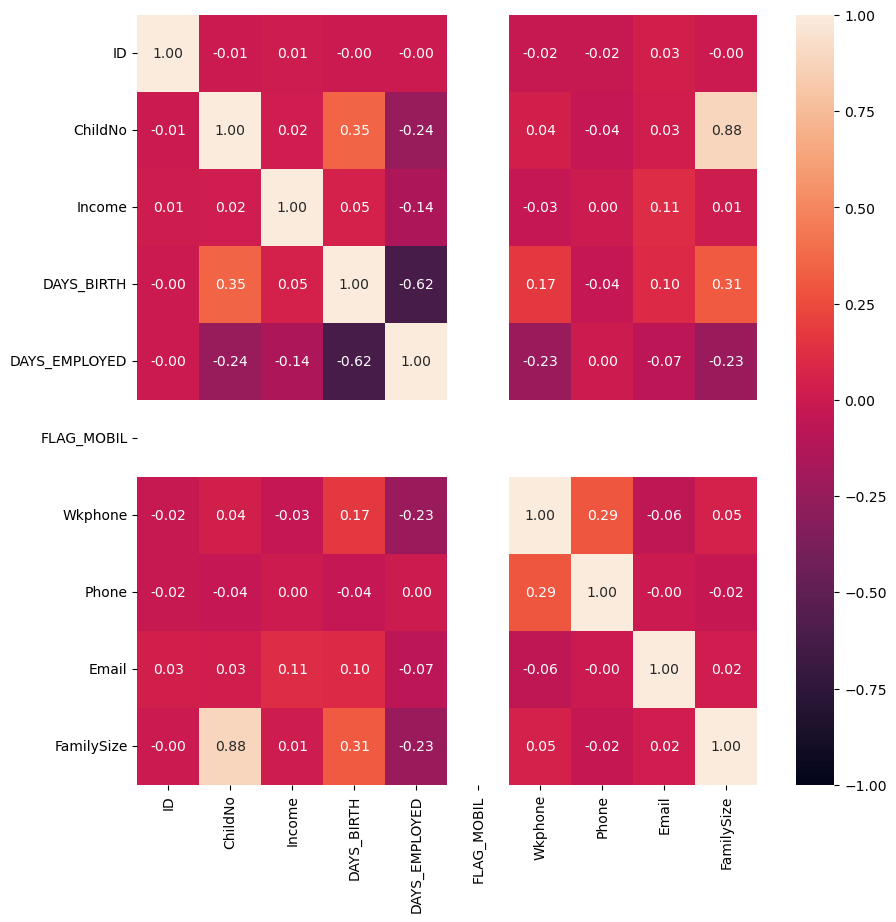

In [87]:
numerical_columns = application.select_dtypes('number').columns
numerical_columns_df = merge_df.select_dtypes('number').columns
plt.figure(figsize=(10, 10))
sns.heatmap(application[numerical_columns].corr(), cmap='rocket', fmt='.2f', annot=True, vmin=-1, vmax=1);

### Gender Distribution

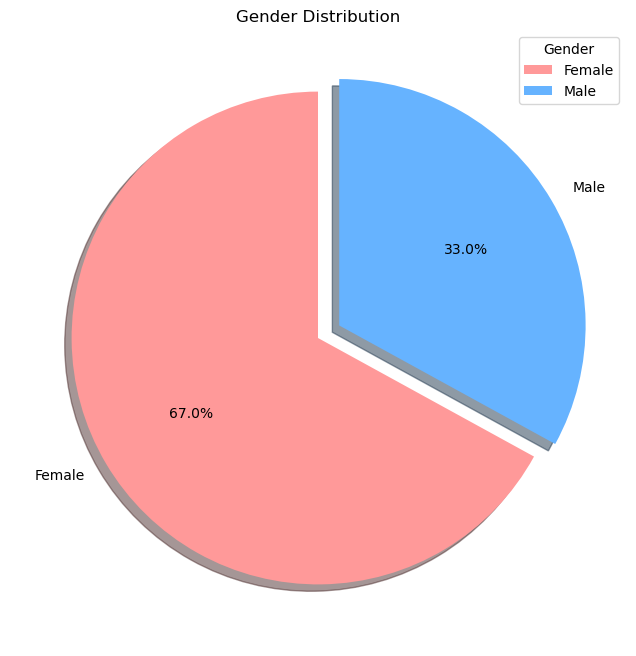

In [88]:
plt.figure(figsize=(8, 8))
colors = ['#ff9999', '#66b3ff']
explode = (0, 0.1)
plt.pie(x=merge_df['Gender'].value_counts().values, labels=['Female', 'Male'],
        autopct='%.1f%%', startangle=90, explode=explode, colors=colors, shadow=True)
plt.legend(title='Gender', loc='upper right')
plt.title('Gender Distribution')
plt.show()

### Car Ownership

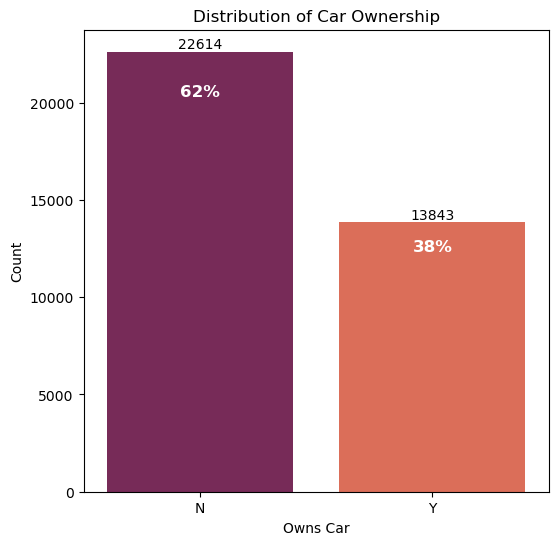

In [89]:
plt.figure(figsize=(6, 6))
ax = sns.barplot(data=merge_df, y= merge_df['Car'].value_counts().values, x=merge_df['Car'].value_counts().index, palette='rocket')
total = len(merge_df)
ax.bar_label(ax.containers[0])
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height / total:.0%}',
                (p.get_x() + p.get_width() / 2, height / 1.1),
                ha='center', va='center', fontsize=12, color='white', fontweight='bold')
    
ax.set_xlabel('Owns Car')
ax.set_ylabel('Count')

ax.set_title('Distribution of Car Ownership')

plt.show()

### Number of Children Distribution

In [90]:
merge_df['ChildNo'].value_counts()

ChildNo
0     25201
1      7492
2      3256
3       419
4        63
5        20
14        3
7         2
19        1
Name: count, dtype: int64

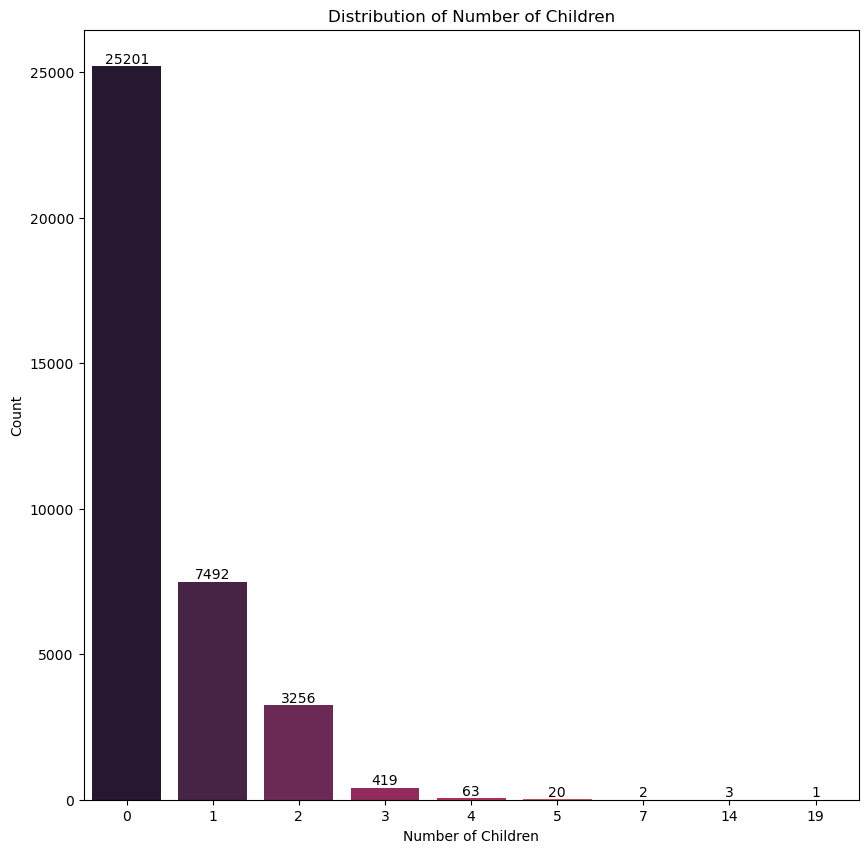

In [92]:
num = merge_df['ChildNo'].value_counts().values
label = merge_df['ChildNo'].value_counts().index
total = len(application)
plt.figure(figsize=(10,10))
ax=sns.barplot(data=merge_df, x=label, y=num, palette='rocket')
ax.bar_label(ax.containers[0])
for p in ax.patches:
    height = p.get_height()

ax.set_ylabel("Count")
ax.set_xlabel("Number of Children")

ax.set_title("Distribution of Number of Children")

plt.show()

### Income Distribution

In [93]:
merge_df['Income'].value_counts()

Income
135000.0    4309
180000.0    3097
157500.0    3089
112500.0    2956
225000.0    2926
            ... 
177750.0       1
594000.0       1
164250.0       1
124200.0       1
179271.0       1
Name: count, Length: 265, dtype: int64

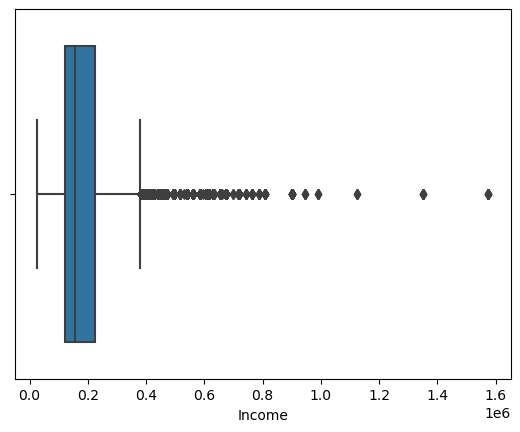

In [94]:
sns.boxplot(x='Income', data=merge_df);

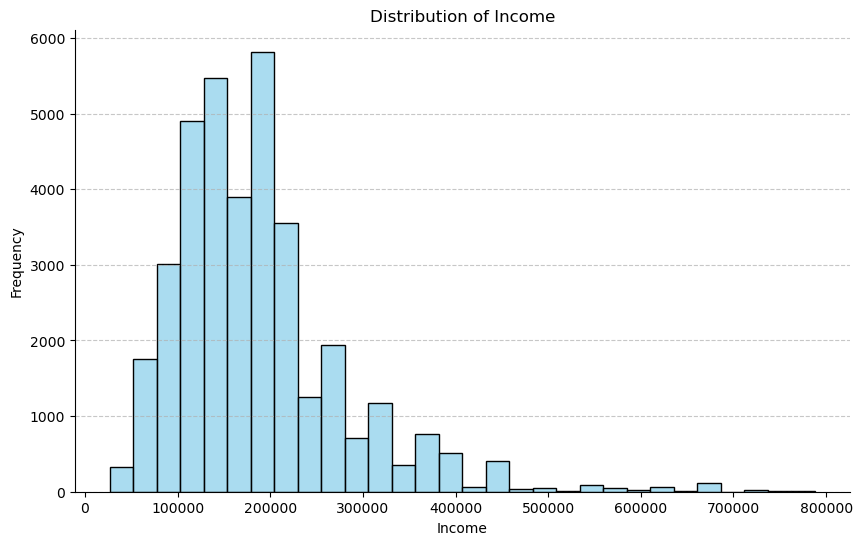

In [97]:
plt.figure(figsize=(10, 6))

ax = sns.histplot(data=merge_df[merge_df['Income'] <= 800000], x='Income', bins=30,
                 color='skyblue', edgecolor='black', alpha=0.7)

ax.set_xlabel('Income')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Income')
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.tick_params(axis='both', which='major', labelsize=10)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()

### Occupation Type Distribution

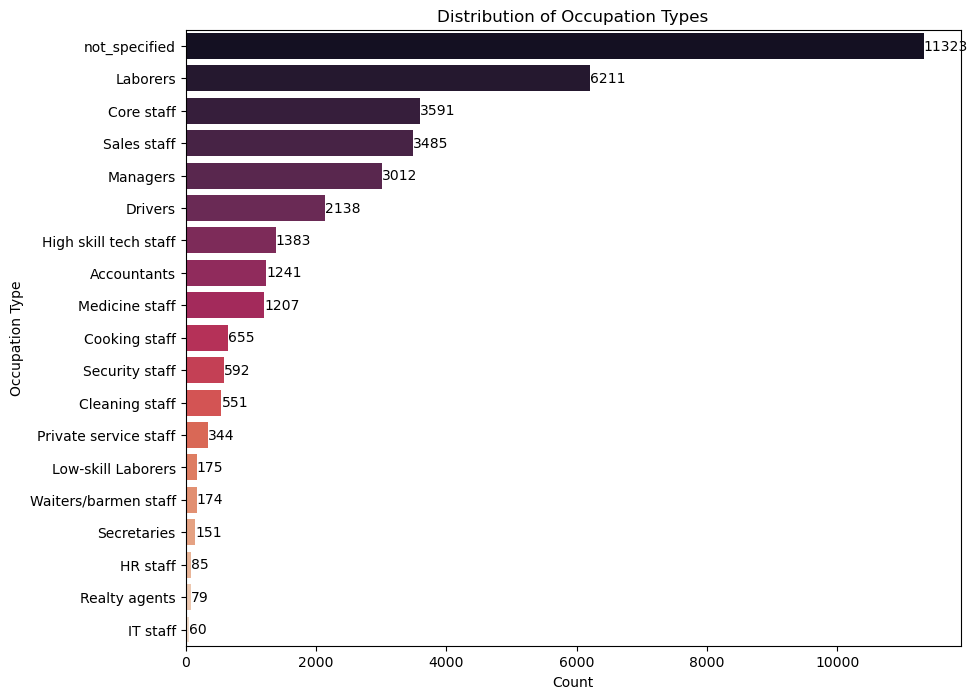

In [99]:
plt.figure(figsize=(10, 8))

sns.barplot(data=merge_df,
            y=merge_df['Occupy'].value_counts().index,
            x=merge_df['Occupy'].value_counts().values,
            palette='rocket')

ax = plt.gca()
for i, v in enumerate(merge_df['Occupy'].value_counts().values):
    ax.text(v , i, str(v), color='black', va='center')

plt.xlabel('Count')
plt.ylabel('Occupation Type')
plt.title('Distribution of Occupation Types')

plt.show()

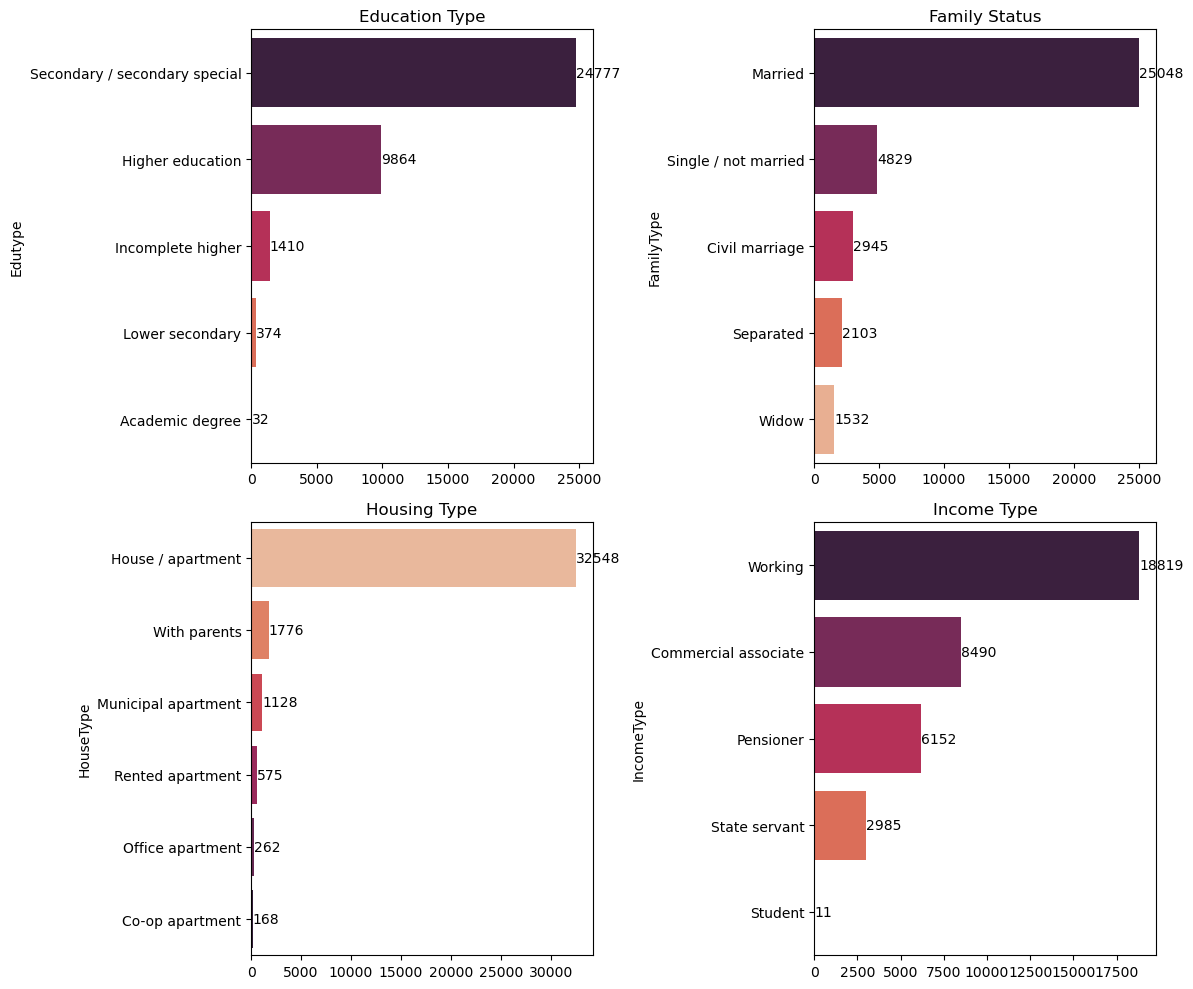

In [100]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

sns.barplot(data=merge_df, x=merge_df['Edutype'].value_counts().values, 
            y=merge_df['Edutype'].value_counts().index, ax=ax[0, 0],palette='rocket')

for i, v in enumerate(merge_df['Edutype'].value_counts().values):
    ax[0, 0].text(v , i, str(v), color='black', va='center')

ax[0, 0].set_title('Education Type')

sns.barplot(data=merge_df, x=merge_df['FamilyType'].value_counts().values, 
            y=merge_df['FamilyType'].value_counts().index, ax=ax[0, 1],palette='rocket')

for i, v in enumerate(merge_df['FamilyType'].value_counts().values):
    ax[0, 1].text(v , i, str(v), color='black', va='center')

ax[0, 1].set_title('Family Status')

sns.barplot(data=merge_df, x=merge_df['HouseType'].value_counts().values, 
            y=merge_df['HouseType'].value_counts().index, ax=ax[1, 0],palette='rocket_r')

for i, v in enumerate(merge_df['HouseType'].value_counts().values):
    ax[1, 0].text(v , i, str(v), color='black', va='center')

ax[1, 0].set_title('Housing Type')

sns.barplot(data=merge_df, x=merge_df['IncomeType'].value_counts().values, 
            y=merge_df['IncomeType'].value_counts().index, ax=ax[1, 1],palette='rocket')

for i, v in enumerate(merge_df['IncomeType'].value_counts().values):
    ax[1, 1].text(v , i, str(v), color='black', va='center')
    
ax[1, 1].set_title('Income Type')

plt.tight_layout()
plt.show()

### Scores Distribution

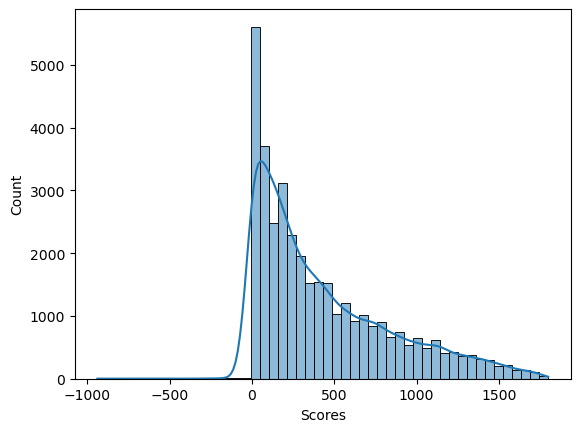

In [101]:
sns.histplot(x=merge_df['Scores'], bins=50, kde=True, fill=True);

In [103]:
len(merge_df)

36457

In [104]:
print(36457 * 0.3)

10937.1


In [109]:
len(merge_df[merge_df['Scores'] >= 650])

9485